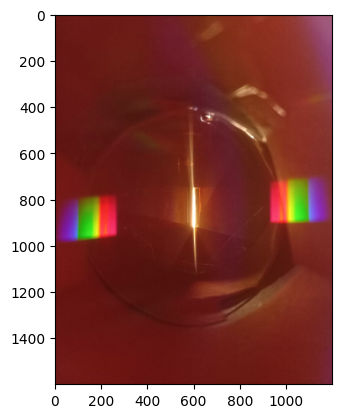

In [330]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("cielo.jpg")
plt.imshow(img)

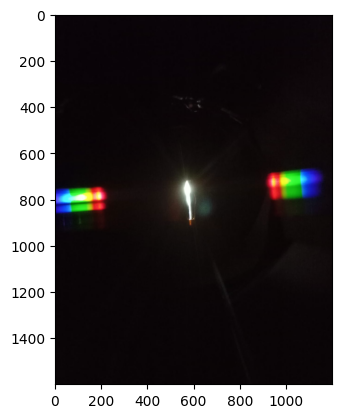

In [331]:
img2= cv2.imread("luz_incandcnt.jpg")
plt.imshow(img2)

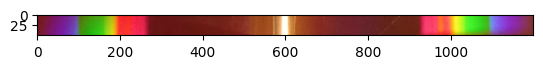

In [332]:

# Define the portion of the image to analyze
x1, y1, x2, y2 = (0, 850, 1600, 900) 
roi = img[y1:y2, x1:x2]
plt.imshow(roi)


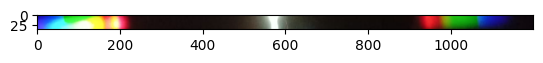

In [333]:

# Define the portion of the image to analyze
x1, y1, x2, y2 = (0, 765, 1600, 800)
roi2 = img2[y1:y2, x1:x2]
plt.imshow(roi2)

In [334]:
roi.dtype

dtype('uint8')

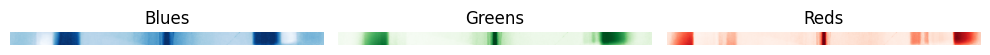

In [335]:
b,g,r = cv2.split(roi)
colormaps = ['Blues', 'Greens', 'Reds']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize for better visualization

# Display image b in the first subplot
axes[0].imshow(b, cmap=plt.get_cmap(colormaps[0]))
axes[0].set_title('Blues')
axes[0].axis('off') 

axes[1].imshow(g, cmap=plt.get_cmap(colormaps[1]))
axes[1].set_title('Greens')
axes[1].axis('off')


axes[2].imshow(r, cmap=plt.get_cmap(colormaps[2]))
axes[2].set_title('Reds')
axes[2].axis('off')

# Show the entire figure with all subplots
plt.tight_layout()  # Adjust spacing between subplots for better readability
plt.show()

In [336]:
print(np.mean(b), np.mean(g), np.mean(r))

139.30245 74.10326666666667 56.299033333333334


array([[ 7,  7,  7, ..., 16, 16, 16],
       [ 7,  7,  7, ..., 16, 16, 16],
       [ 7,  7,  7, ..., 16, 16, 16],
       ...,
       [ 9,  9, 10, ..., 12, 12, 13],
       [ 9, 10, 10, ..., 12, 12, 12],
       [ 9, 10, 10, ..., 12, 12, 12]], dtype=uint8)

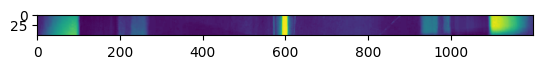

In [337]:
beta = 255/3
norm_b = cv2.normalize(b, None, alpha=0.0, beta=beta, norm_type=cv2.NORM_MINMAX)
norm_g = cv2.normalize(g, None, alpha=0.0, beta=beta, norm_type=cv2.NORM_MINMAX)
norm_r = cv2.normalize(r, None, alpha=0.0, beta=beta, norm_type=cv2.NORM_MINMAX)

plt.imshow(norm_r)
norm_r

# Trabajar con el cubo de datos

In [338]:
# observa que hay 3 canales de color
print(roi2.shape)


(35, 1200, 3)


In [339]:
#means per channel
means_pc = np.mean(np.mean(roi, axis=1), axis=0)

In [340]:

def threshold_vectorized(image, thresholds):
  """
  Applies separate thresholds to each channel of a multi-channel image using NumPy.

  Args:
      image: NumPy array representing the multi-channel image.
      thresholds: A list or NumPy array containing the threshold values for each channel.

  Returns:
      A NumPy array representing the thresholded image.
  """

  # Reshape thresholds to match the image shape for broadcasting
  thresholds_reshaped = thresholds.reshape((1, 1, len(thresholds)))

  # Create a mask using boolean comparison with thresholds
  mask = image > thresholds_reshaped

  # Apply the mask to the image using element-wise multiplication
  thresholded_image = image * mask.astype(np.uint8)

  return thresholded_image


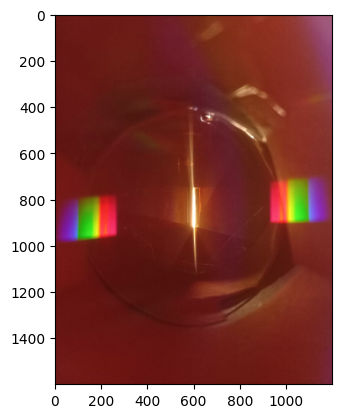

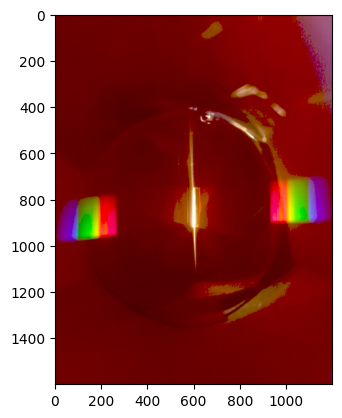

In [341]:
# Usando el promedio global
#img2
test_image = img

thresholds = np.mean(test_image).reshape(1,1)

thresholded_image = threshold_vectorized(test_image, thresholds)

plt.imshow(test_image)
plt.show()
plt.imshow(thresholded_image)
plt.show()

In [342]:
test_image.shape

(1600, 1200, 3)

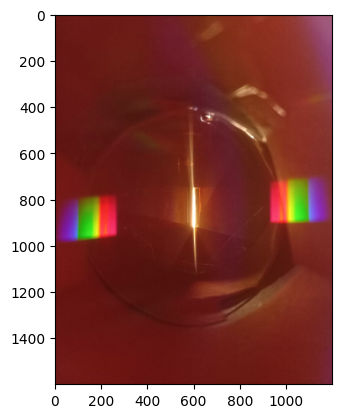

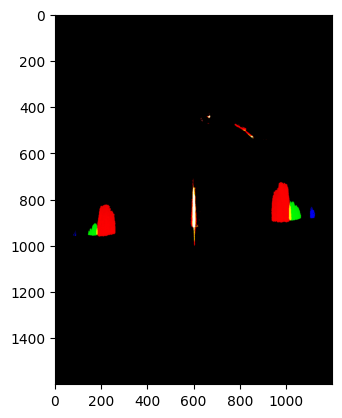

In [343]:
# Usando la media
thresholds = np.max(test_image, axis=(0,1))

thresholded_image = threshold_vectorized(test_image, 0.90*thresholds)

plt.imshow(test_image)
plt.show()
plt.imshow(thresholded_image)
plt.show()

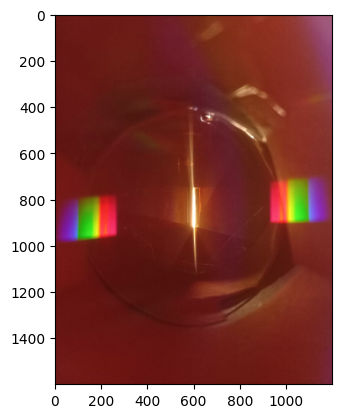

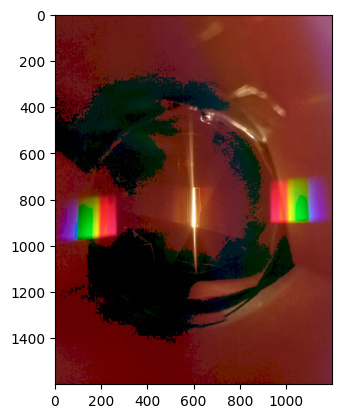

In [344]:
# Usando el el cuartil
thresholds = np.percentile(test_image, q=25, axis=(0,1), out=None, method='linear')

thresholded_image = threshold_vectorized(test_image, thresholds)

plt.imshow(test_image)
plt.show()
plt.imshow(thresholded_image)
plt.show()

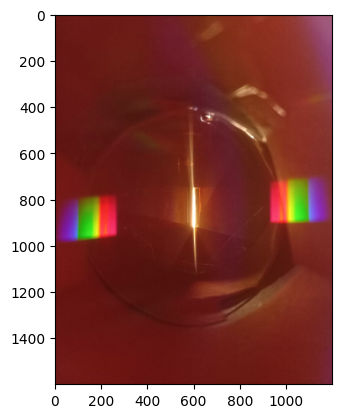

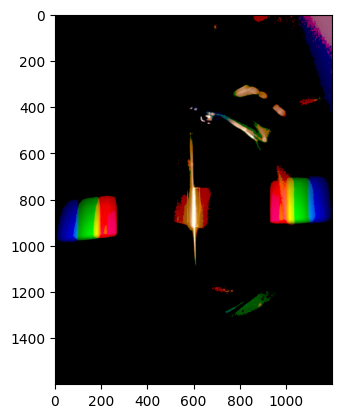

In [345]:
# Usando el el 3r cuartil
thresholds = np.percentile(test_image, q=95, axis=(0,1), out=None, method='linear')

thresholded_image = threshold_vectorized(test_image, thresholds)

plt.imshow(test_image)
plt.show()
plt.imshow(thresholded_image)
plt.show()

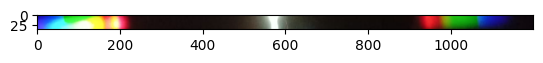

In [346]:
plt.imshow(roi2)

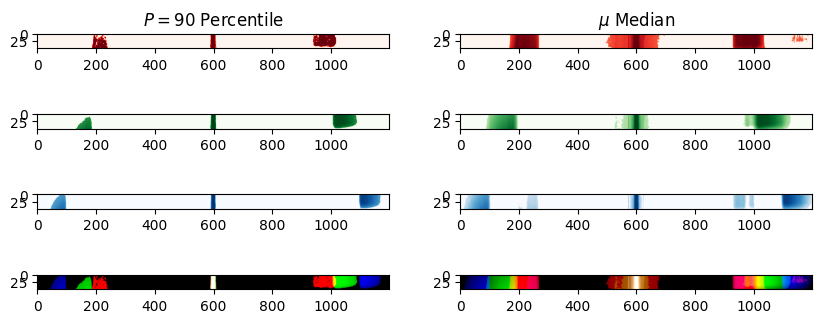

In [347]:
image = roi # imagen
Q = 90 # quartil

quartils = np.percentile(image, q=Q, axis=(0,1), out=None, method='linear')
thresholdQ = threshold_vectorized(image, quartils)

means = np.mean(image, axis=(0,1))
thresholdM = threshold_vectorized(image, means)


# plt.imshow(thresholded_image)
# plt.show()


lista_arrays = [thresholdQ, thresholdM]
colormaps = ['Reds', 'Greens','Blues']


fig, axes = plt.subplots(4, len(lista_arrays), figsize=(10,4))

axes[3,0].imshow(thresholdQ)
axes[3,1].imshow(thresholdM)

for j in range(len(lista_arrays)):
    A = cv2.split(lista_arrays[j])
    for i in range(len(A)):
        axes[i,j].imshow(A[i], cmap=plt.get_cmap(colormaps[i]))

# [row, columns]
axes[0,0].set_title(f'$P = {Q}$ Percentile')
axes[0,1].set_title('$\mu$ Median')


plt.show()


In [348]:
# con este metodo no parece haber overflow para 25
# pero es demostrable que no superara nunca los 255?
# como puede normalizarse para ser suficiente?
np.max(np.sum(thresholdQ/np.mean(thresholdQ), axis=0, dtype=np.uint8))

253

uint8
Max value: 250


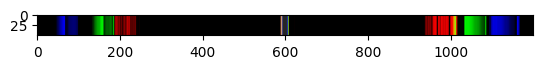

In [349]:

# usando el numero de celdas verticales
cumsum = np.sum(thresholdQ/thresholdQ.shape[0], axis=0,dtype=np.uint8)

spectrum1 = np.broadcast_to(
    cumsum, 
    thresholdQ.shape)
plt.imshow(spectrum)
print(spectrum.dtype)
print("Max value:", np.max(cumsum))

uint8
Max value: 253


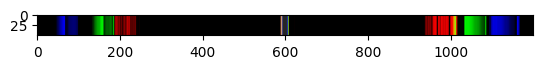

In [350]:
# usando el promedio
cumsum = np.sum(thresholdQ/np.mean(thresholdQ), axis=0,dtype=np.uint8)

spectrum2 = np.broadcast_to(
    cumsum, 
    thresholdQ.shape)
plt.imshow(spectrum)
print(spectrum.dtype)
print("Max value:", np.max(cumsum))

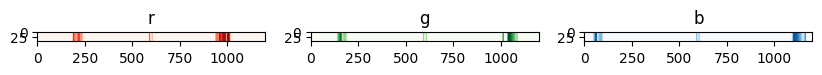

In [351]:
# Script para hacerlo en paralelo
r_array, g_array, b_array = cv2.split(spectrum)
colormaps = ['Reds', 'Greens','Blues']

fig, axes = plt.subplots(1, 3, figsize=(10, 4)) 
axes[0].imshow(r_array, cmap=plt.get_cmap(colormaps[0]))
axes[1].imshow(g_array, cmap=plt.get_cmap(colormaps[1]))
axes[2].imshow(b_array, cmap=plt.get_cmap(colormaps[2]))

axes[0].set_title('r')
axes[1].set_title('g')
axes[2].set_title('b')

plt.show()


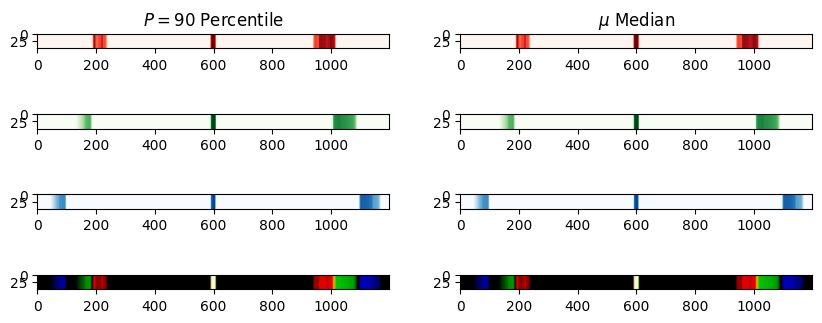

In [352]:

lista_arrays = [spectrum1, spectrum1]
colormaps = ['Reds', 'Greens','Blues']

fig, axes = plt.subplots(4, len(lista_arrays), figsize=(10,4))

axes[3,0].imshow(lista_arrays[0])
axes[3,1].imshow(lista_arrays[1])

for j in range(len(lista_arrays)):
    A = cv2.split(lista_arrays[j])
    for i in range(len(A)):
        axes[i,j].imshow(A[i], cmap=plt.get_cmap(colormaps[i]))

# [row, columns]
axes[0,0].set_title(f'$P = {Q}$ Percentile')
axes[0,1].set_title('$\mu$ Median')



plt.show()

In [353]:
A = cv2.split(lista_arrays[0])

In [354]:
lista_arrays[0][0,:,2]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

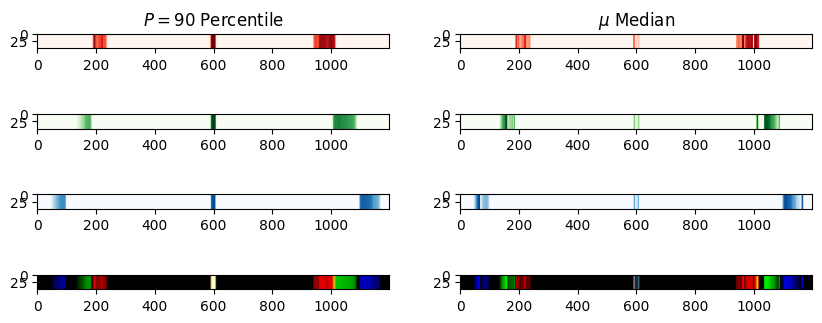

In [355]:

lista_arrays = [spectrum1, spectrum2]
colormaps = ['Reds', 'Greens','Blues']

fig, axes = plt.subplots(4, len(lista_arrays), figsize=(10,4))

axes[3,0].imshow(lista_arrays[0])
axes[3,1].imshow(lista_arrays[1])

for j in range(len(lista_arrays)):
    A = cv2.split(lista_arrays[j])
    for i in range(len(A)):
        axes[i,j].imshow(A[i], cmap=plt.get_cmap(colormaps[i]))

# [row, columns]
axes[0,0].set_title(f'$P = {Q}$ Percentile')
axes[0,1].set_title('$\mu$ Median')



plt.show()

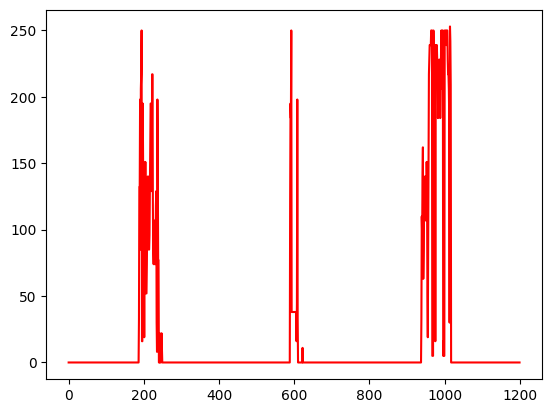

In [356]:

i = 0
plt.plot(lista_arrays[j][0,:,i], color=colors[i])


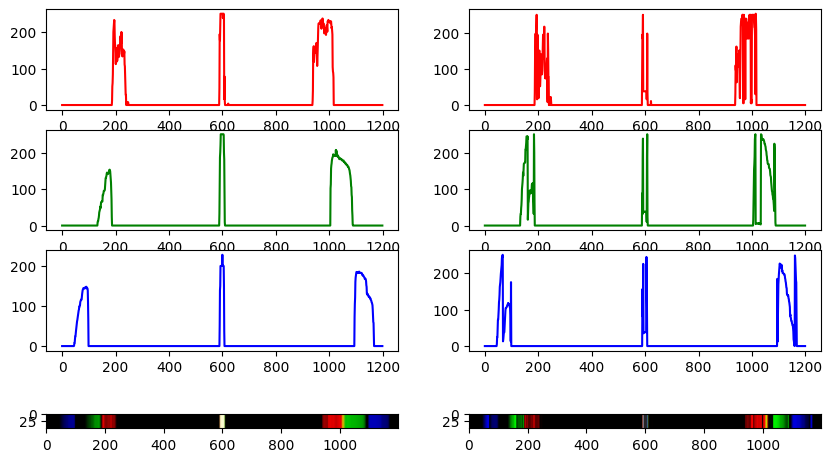

In [357]:
colors=["r","g","b"]

fig, axes = plt.subplots(4, len(lista_arrays), figsize=(10,6))

for j in range(len(lista_arrays)):
    for i in range(3):
        axes[i,j].plot(lista_arrays[j][0,:,i], color=colors[i])

axes[3,0].imshow(lista_arrays[0])
axes[3,1].imshow(lista_arrays[1])

plt.show()

In [358]:
lista_arrays[j][0,:,:].shape

(1200, 3)

In [359]:
np.sum(lista_arrays[j][0,:,:], axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)

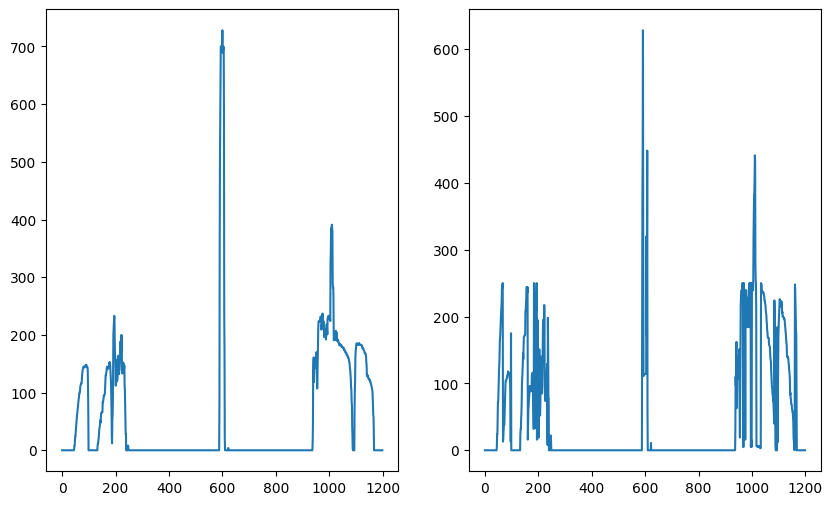

In [360]:
fig, axes = plt.subplots(1, len(lista_arrays), figsize=(10,6))


for j in range(len(lista_arrays)):
        axes[j].plot(np.sum(lista_arrays[j][0,:,:], axis=1))



plt.show()

In [361]:
total_spectra_1 = np.sum(lista_arrays[0][0,:,:], axis=1)

index_of_max = np.argmax(total_spectra_1 == np.max(total_spectra_1))
index_of_max

600

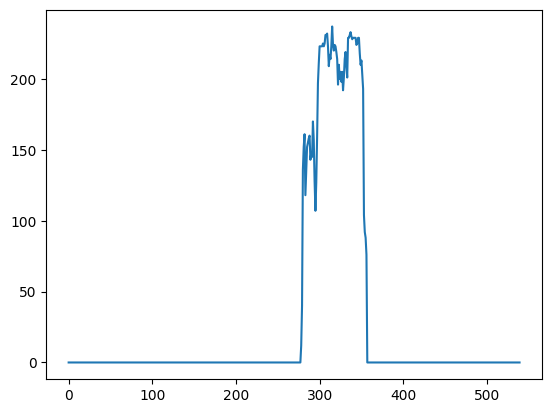

In [362]:
# r,g,b working with r
total_spectra_r = lista_arrays[0][0,:,0]

plt.plot(total_spectra_r[int(index_of_max * 1.1):])

In [363]:
import numpy as np


def process_array_first_bump(data, index_of_max, sigma = 1):
  """
  This function processes a 1D array using NumPy acrobatics to find the
  index of the first value exceeding 5 sigma of the data after modifying it.

  Args:
      data: A 1D NumPy array.

  Returns:
      The index of the first value that's over 5 sigma of the data after processing.
  """


  # Slice the array from the index of maximum value onwards
  sliced_data = data[index_of_max:]
  modified_array = sliced_data.copy()
  # Replace the first 10% of elements with 0
  num_elements = len(modified_array)
  num_to_replace = int(0.1 * num_elements)

  modified_array[:num_to_replace] = 0

  # Calculate standard deviation
  std_dev = np.std(modified_array)

  # Find the index of the first value exceeding 5 standard deviations
  sigma_ = sigma * std_dev
  index_over_threshold = np.argmax(modified_array > sigma_)

  # If no value exceeds the threshold, return -1
  if index_over_threshold == 0 and modified_array[0] <= sigma_:
    return -1

  # Combine the indices for final result (considering slicing)
  return index_of_max + index_over_threshold



total_spectra = np.sum(lista_arrays[0][0,:,:], axis=0)
max_value = np.max(total_spectra_r)
index_of_max = np.argmax(total_spectra_r == max_value)

result_index = process_array_first_bump(total_spectra_r, index_of_max)



corriendo en paralelo

In [390]:

thresholdQ1 = threshold_vectorized(roi, 
    np.percentile(roi, q=Q, axis=(0,1), out=None, method='linear'))

Q = 0.95
thresholdQ2 = threshold_vectorized(roi2,
    np.percentile(roi2, q=Q, axis=(0,1), out=None, method='linear'))

# del(cumsum1, cumsum2, spectrum1, spectrum2, lista_arrays)

#cumsum1 = np.sum(thresholdQ1/np.mean(thresholdQ1), axis=0,dtype=np.uint32)
cumsum1 = np.sum(thresholdQ1, axis=0,dtype=np.uint32) / np.mean(thresholdQ1)
# cumsum1 = cumsum1 * 255.0 / np.max(cumsum1)
spectrum1 = np.broadcast_to(
    cumsum1, 
    thresholdQ1.shape)

#cumsum2 = np.sum(thresholdQ2/np.mean(thresholdQ2), axis=0,dtype=np.uint32)
cumsum2 = np.sum(thresholdQ2, axis=0,dtype=np.uint32)
cumsum2 = 255.0 * cumsum2 / np.max(cumsum2)
#cumsum2 = cumsum2 * 255.0 / np.max(cumsum2)
spectrum2 = np.broadcast_to(
    cumsum2, 
    thresholdQ2.shape)

lista_arrays_originales = [thresholdQ1, thresholdQ2]
lista_arrays = [spectrum1, spectrum2]


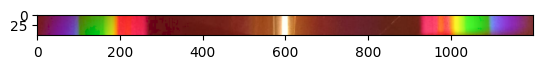

In [391]:
plt.imshow(lista_arrays_originales[0])

iom: 598
ri: 931
ri: 1008
ri: 1097
iom: 572
ri: 934
ri: 989
ri: 1068


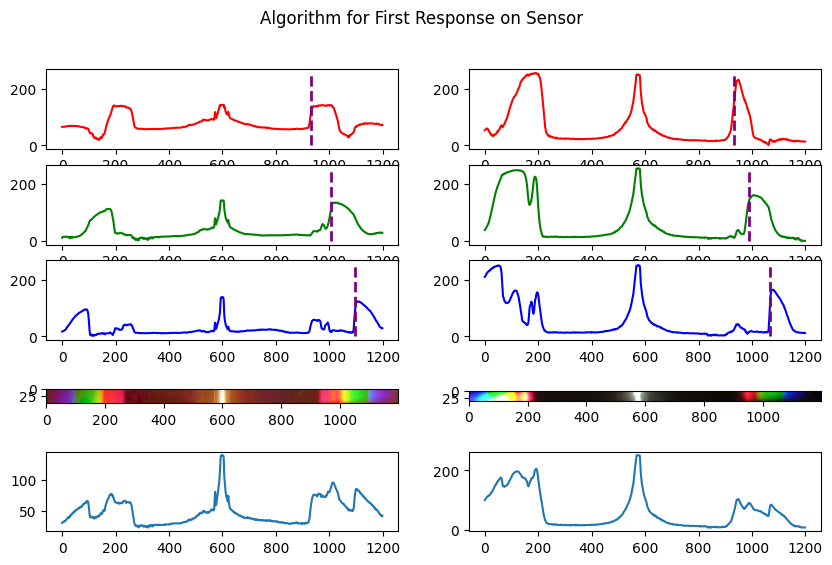

In [393]:
colors=["r","g","b"]

fig, axes = plt.subplots(5, len(lista_arrays), figsize=(10,6))

fig.suptitle('Algorithm for First Response on Sensor', fontsize=12)  # Set main title for the figure

for j in range(len(lista_arrays)):
    total_spectra = np.sum(
        lista_arrays[j][:,:,:], axis=(0,2), 
        dtype=np.int32)/ (lista_arrays[j].shape[0]*lista_arrays[j].shape[2])
    total_spectra.shape
    axes[4,j].plot(total_spectra)
    max_value = np.max(total_spectra)
    index_of_max = np.argmax(total_spectra == max_value)
    print("iom:",index_of_max)

    for i in range(3):
        axes[i,j].plot(lista_arrays[j][0,:,i], color=colors[i])
    
        result_index = process_array_first_bump(
            lista_arrays[j][0,:,i],index_of_max, sigma=3)
        print("ri:",result_index )
        axes[i,j].vlines(result_index, 0, 255,linewidths=2, linestyles='dashed', color='purple')


axes[3,0].imshow(lista_arrays_originales[0])
axes[3,1].imshow(lista_arrays_originales[1])


plt.show()

# Mejoras
- Incluir todos los canaqles de colores posibles mediante